## MTA Daily Ridership

On March 8 2021, The New York Times published an article named "[How Corona Virus Has Changed New York Cit Transit in One Chart](https://www.nytimes.com/interactive/2021/03/08/climate/nyc-transit-covid.html)". The chart looks like the following:

<div>
<img src="https://static01.nyt.com/images/2021/03/07/us/nyc-transit-covid-promo-1615150889393/nyc-transit-covid-promo-1615150889393-superJumbo.png" width="800"/>
</div>

This chart shows the percentage of decline of ridership for bridges/tunnels, subways, buses, LIRR and Metro North. It visualizes the profound disruption of the pandemic on the large public transit system in New York City. It also shows that although the daily ridership has bounced back somewhat by March 2021, it has not fully recovered to the pre-pandemic level. It is interesting to extend this chart to include more recent data to see if we have recovered from the pandemic disruption by now.

In this assignment, your task is to reproduce and extend this chart to December 2023. The following dataset is used:

* [MTA Daily Ridership Data: Beginning 2020](https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-Beginning-2020/vxuj-8kew/about_data)

The chart should be a line chart just like the one in the New York Times. Here are the requirements:

* The X axis should go from March 2020 all the way to Dec 31, 2023.
* The Y axis should show the percentage decline from the pre-pandemic ridership level.
* There should be 5 curves corresponding to bridges/tunnels, subway, buses, LIRR and Metro North just like in the original NYT chart.
* The data to encode in the Y-axis should be the 3-day moving average of the daily ridership data. I.e. The data used for Jan 3, 2023 should be the average of the data of Jan 1, Jan 2 and Jan 3 in 2023.
* Each curve should be labeled at the end of the curve (i.e. with a dot and text at the location of the last data point).
* A vertical line showing the date of New York lockdown on March 22, 2020.
* A horizontal line showing the 100% level.

Please submit the complete notebook and the resulting visualization in .png, .svg or .html format.

# Import data and appropriate libraries

In [341]:
import altair as alt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [342]:
url = "https://github.com/qnzhou/practical_data_visualization_in_python/files/14484180/MTA_Daily_Ridership_Data__Beginning_2020_20240304.csv"
data = pd.read_csv(url)

# Clean Data

In [343]:
data.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,NaN,NaN,55826,0.59,19922,1.13,786961,0.98,1636.0,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569.0,1.03,180702,0.66,30338,1.02,874620,0.95,17140.0,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727.0,1.02,190648,0.69,32767,1.10,882175,0.96,17453.0,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662.0,0.99,192689,0.70,34297,1.15,905558,0.98,17136.0,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597.0,0.98,194387,0.70,33209,1.12,929298,1.01,17203.0,1.08


In [344]:
# We notice a discrepancy in the data as compared to the chart from new york times 
data.loc[175:195]

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
175,08/23/2020,671560,0.28,9698,0.01,37891.0,0.36,22497,0.22,8297,0.46,737097,0.80,633.0,0.18
176,08/24/2020,1307345,0.25,34021,0.02,75145.0,0.24,35904,0.13,17643,0.63,815665,0.84,2756.0,0.21
177,08/25/2020,1346490,0.26,34993,0.02,73331.0,0.23,35689,0.13,18682,0.67,821597,0.85,2845.0,0.21
178,08/26/2020,1407639,0.27,35975,0.02,76583.0,0.24,36621,0.13,20659,0.74,859625,0.88,3012.0,0.23
179,08/27/2020,1358272,0.26,33969,0.02,73060.0,0.23,35551,0.13,19271,0.69,847285,0.87,2856.0,0.21
180,08/28/2020,1388583,0.27,31956,0.02,76114.0,0.24,41222,0.15,18845,0.67,899892,0.93,2716.0,0.20
181,08/29/2020,773667,0.26,14035,0.01,37641.0,0.28,22235,0.15,9814,0.59,645956,0.67,798.0,0.17
182,08/30/2020,748061,0.31,16027,0.01,45147.0,0.43,26521,0.26,9752,0.54,805096,0.87,825.0,0.23
183,08/31/2020,1397264,0.27,787291,0.39,78122.0,0.25,37727,0.14,18185,0.65,817544,0.84,3184.0,0.24
184,09/01/2020,1469274,0.25,947758,0.41,76483.0,0.23,36035,0.12,18929,0.64,809685,0.85,3217.0,0.19


In [345]:
# Convert date type
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Calculate 3 Day Rolling Average

In [346]:
# Calculate the 3-day moving average for ridership
data['Subways_MA'] = data['Subways: % of Comparable Pre-Pandemic Day'].rolling(window=3).mean()
data['Buses_MA'] = data['Buses: % of Comparable Pre-Pandemic Day'].rolling(window=3).mean()
data['LIRR_MA'] = data['LIRR: % of Comparable Pre-Pandemic Day'].rolling(window=3).mean()
data['Metro_North_MA'] = data['Metro-North: % of Comparable Pre-Pandemic Day'].rolling(window=3).mean()
data['Bridges_Tunnels_MA'] = data['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'].rolling(window=3).mean()

In [347]:
data.loc[175:195]

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Subways_MA,Buses_MA,LIRR_MA,Metro_North_MA,Bridges_Tunnels_MA
175,2020-08-23,671560,0.28,9698,0.01,37891.0,0.36,22497,0.22,8297,0.46,737097,0.80,633.0,0.18,0.283333,0.013333,0.323333,0.183333,0.863333
176,2020-08-24,1307345,0.25,34021,0.02,75145.0,0.24,35904,0.13,17643,0.63,815665,0.84,2756.0,0.21,0.276667,0.013333,0.323333,0.176667,0.830000
177,2020-08-25,1346490,0.26,34993,0.02,73331.0,0.23,35689,0.13,18682,0.67,821597,0.85,2845.0,0.21,0.263333,0.016667,0.276667,0.160000,0.830000
178,2020-08-26,1407639,0.27,35975,0.02,76583.0,0.24,36621,0.13,20659,0.74,859625,0.88,3012.0,0.23,0.260000,0.020000,0.236667,0.130000,0.856667
179,2020-08-27,1358272,0.26,33969,0.02,73060.0,0.23,35551,0.13,19271,0.69,847285,0.87,2856.0,0.21,0.263333,0.020000,0.233333,0.130000,0.866667
180,2020-08-28,1388583,0.27,31956,0.02,76114.0,0.24,41222,0.15,18845,0.67,899892,0.93,2716.0,0.20,0.266667,0.020000,0.236667,0.136667,0.893333
181,2020-08-29,773667,0.26,14035,0.01,37641.0,0.28,22235,0.15,9814,0.59,645956,0.67,798.0,0.17,0.263333,0.016667,0.250000,0.143333,0.823333
182,2020-08-30,748061,0.31,16027,0.01,45147.0,0.43,26521,0.26,9752,0.54,805096,0.87,825.0,0.23,0.280000,0.013333,0.316667,0.186667,0.823333
183,2020-08-31,1397264,0.27,787291,0.39,78122.0,0.25,37727,0.14,18185,0.65,817544,0.84,3184.0,0.24,0.280000,0.136667,0.320000,0.183333,0.793333
184,2020-09-01,1469274,0.25,947758,0.41,76483.0,0.23,36035,0.12,18929,0.64,809685,0.85,3217.0,0.19,0.276667,0.270000,0.303333,0.173333,0.853333


In [348]:
pre_pandemic_data = data[data['Date'] == '2022-01-01']
pre_pandemic_data

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Subways_MA,Buses_MA,LIRR_MA,Metro_North_MA,Bridges_Tunnels_MA
671,2022-01-01,1027918,0.38,350845,0.29,33980.0,0.35,30341,0.23,4904,0.34,498515,0.65,1262.0,0.31,0.476667,0.486667,0.536667,0.45,0.783333


In [349]:
march_22_2020_data = data[data['Date'] == '2020-03-22']
march_22_2020_data

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Subways_MA,Buses_MA,LIRR_MA,Metro_North_MA,Bridges_Tunnels_MA
21,2020-03-22,408723,0.18,73517,0.07,8891.0,0.1,20830,0.22,4824,0.27,277051,0.34,641.0,0.2,0.206667,0.256667,0.126667,0.306667,0.463333


In [350]:
dec_2023_data = data[data['Date'] == '2023-12-31']
dec_2023_data

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Subways_MA,Buses_MA,LIRR_MA,Metro_North_MA,Bridges_Tunnels_MA
1400,2023-12-31,1934651,0.76,548344,0.56,99817.0,0.94,89554,0.83,20005,1.12,671873,0.84,2029.0,0.6,0.7,0.543333,0.88,0.783333,0.936667


In [351]:
data[['Date','Subways_MA','Buses_MA','LIRR_MA','Metro_North_MA','Bridges_Tunnels_MA']]

,Date,Subways_MA,Buses_MA,LIRR_MA,Metro_North_MA,Bridges_Tunnels_MA
0,2020-03-01,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,0.970000,0.990000,NaN,0.646667,0.963333
3,2020-03-04,0.976667,0.983333,1.013333,0.683333,0.963333
4,2020-03-05,0.986667,0.986667,0.996667,0.696667,0.983333
...,...,...,...,...,...,...
1456,2024-02-25,0.730000,0.586667,1.016667,0.766667,1.056667
1457,2024-02-26,0.743333,0.610000,1.026667,0.773333,1.040000
1458,2024-02-27,0.706667,0.610000,0.873333,0.776667,1.030000
1459,2024-02-28,0.676667,0.600000,0.746667,0.736667,1.003333


# Plot the Data

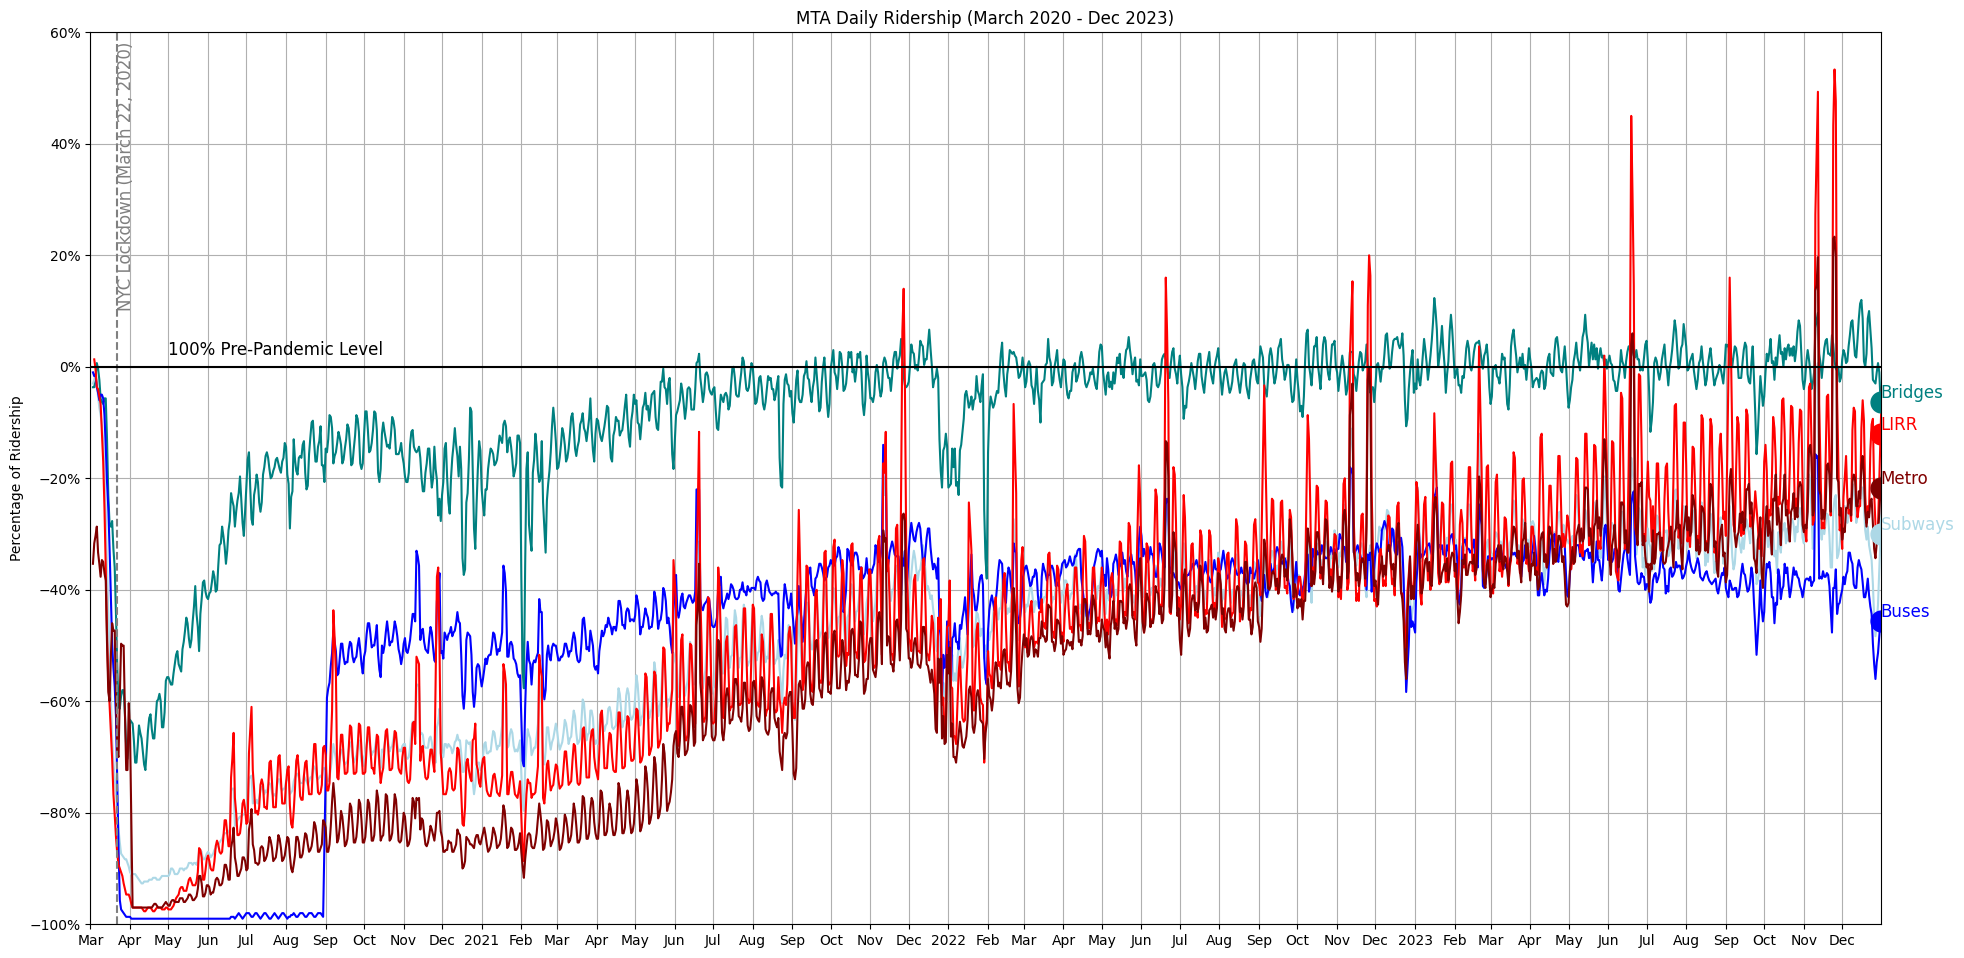

In [363]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the moving averages
plt.plot(data['Date'], -100 + data['Bridges_Tunnels_MA'] * 100, label='Bridges & Tunnels', color='teal')
plt.plot(data['Date'], -100 + data['Subways_MA'] * 100, label='Subways', color='lightblue')
plt.plot(data['Date'], -100 + data['Buses_MA'] * 100, label='Buses', color='blue')
plt.plot(data['Date'], -100 + data['LIRR_MA'] * 100, label='LIRR', color='red')
plt.plot(data['Date'], -100 + data['Metro_North_MA'] * 100, label='Metro North', color='maroon')

# Adding the vertical and horizontal lines
plt.axvline(x=pd.to_datetime('2020-03-22'), color='gray', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')

# Adding text label for the lines
plt.text(pd.to_datetime('2020-03-22'), 10, 'NYC Lockdown (March 22, 2020)', 
         color='gray', fontsize=12, rotation=90, ha='left', va='bottom')
plt.text(datetime(2020, 5, 1), 3, '100% Pre-Pandemic Level', 
         color='black', fontsize=12, ha='left', va='center')

# Filter the row corresponding to 2023-12-31 
target_date = pd.to_datetime('2023-12-31')
data_dec31 = data[data['Date'] == target_date]

if not data_dec31.empty:
    systems = ['Bridges_Tunnels_MA', 'Subways_MA', 'Buses_MA', 'LIRR_MA', 'Metro_North_MA']
    colors = ['teal', 'lightblue', 'blue', 'red', 'maroon']

    for i, system in enumerate(systems):
        y_value = -100 + data_dec31[system].values[0] * 100
        plt.plot(target_date, y_value, marker='o', color=colors[i], markersize=15)
        plt.text(target_date, y_value, system.split('_')[0], 
                 color=colors[i], fontsize=12, ha='left', va='bottom')

# Set y-axis limits
plt.ylim(-100, 60)

# Set X-axis limits
ax.set_xlim(datetime(2020, 3, 1), datetime(2023, 12, 31))

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# format x axis to show month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

plt.margins(x=15, y=15) 

plt.title("MTA Daily Ridership (March 2020 - Dec 2023)")
# plt.xlabel('Date')
plt.ylabel('Percentage of Ridership')
plt.grid(True)
plt.tight_layout(pad=2)
plt.show()


In [362]:
# Save the plot as a PNG
fig.savefig('HW5.png', dpi=300)